# Importing Libraries

In [52]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
    
import eda_helper_functions

from sklearn.ensemble import IsolationForest

# Read the training dataset

In [38]:
file_path = '../data/train.csv'

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-27,delhi,cochin,09:00:00,21:00:00,720,1.0,No info,12537
1,Indigo,2019-06-03,delhi,cochin,10:35:00,01:30:00,895,1.0,No info,5883
2,Spicejet,2019-04-03,kolkata,banglore,15:05:00,20:20:00,315,1.0,No info,4649
3,Air India,2019-03-06,mumbai,hyderabad,05:05:00,16:55:00,710,2.0,No info,16697
4,Jet Airways,2019-06-21,banglore,delhi,18:55:00,22:00:00,185,0.0,in-flight meal not included,7754
...,...,...,...,...,...,...,...,...,...,...
3195,Multiple Carriers,2019-03-21,delhi,cochin,09:00:00,15:30:00,390,1.0,No info,8307
3196,Air India,2019-04-09,delhi,cochin,14:05:00,17:55:00,230,0.0,No info,6724
3197,Jet Airways,2019-05-01,kolkata,banglore,09:35:00,23:35:00,840,1.0,No info,13067
3198,Jet Airways,2019-03-15,banglore,new delhi,21:25:00,05:05:00,460,1.0,No info,27210


In [39]:
train.airline.unique()

array(['Multiple Carriers', 'Indigo', 'Spicejet', 'Air India',
       'Jet Airways', 'Vistara', 'Air Asia', 'Goair'], dtype=object)

## check data types

In [40]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

 ##### -) date_of_journey, arrival_time, dep_time should be in date time type.
  ##### -) total_stops can be a categorical (object) data type. --> for now keeping it same, if required will change during eda.
  

### fixing datatype

In [41]:
train = train.assign(**{
        col : pd.to_datetime(train.loc[:,col], dayfirst=True, format="mixed")
        for col in ['date_of_journey', 'arrival_time','dep_time']
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [42]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-03-27,delhi,cochin,2024-06-18 09:00:00,2024-06-18 21:00:00,720,1.0,No info,12537
1,Indigo,2019-06-03,delhi,cochin,2024-06-18 10:35:00,2024-06-18 01:30:00,895,1.0,No info,5883
2,Spicejet,2019-04-03,kolkata,banglore,2024-06-18 15:05:00,2024-06-18 20:20:00,315,1.0,No info,4649
3,Air India,2019-03-06,mumbai,hyderabad,2024-06-18 05:05:00,2024-06-18 16:55:00,710,2.0,No info,16697
4,Jet Airways,2019-06-21,banglore,delhi,2024-06-18 18:55:00,2024-06-18 22:00:00,185,0.0,in-flight meal not included,7754
...,...,...,...,...,...,...,...,...,...,...
3195,Multiple Carriers,2019-03-21,delhi,cochin,2024-06-18 09:00:00,2024-06-18 15:30:00,390,1.0,No info,8307
3196,Air India,2019-04-09,delhi,cochin,2024-06-18 14:05:00,2024-06-18 17:55:00,230,0.0,No info,6724
3197,Jet Airways,2019-05-01,kolkata,banglore,2024-06-18 09:35:00,2024-06-18 23:35:00,840,1.0,No info,13067
3198,Jet Airways,2019-03-15,banglore,new delhi,2024-06-18 21:25:00,2024-06-18 05:05:00,460,1.0,No info,27210


# High Level Summary Of Data

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          3200 non-null   object        
 1   date_of_journey  3200 non-null   datetime64[ns]
 2   source           3200 non-null   object        
 3   destination      3200 non-null   object        
 4   dep_time         3200 non-null   datetime64[ns]
 5   arrival_time     3200 non-null   datetime64[ns]
 6   duration         3200 non-null   int64         
 7   total_stops      3200 non-null   float64       
 8   additional_info  3200 non-null   object        
 9   price            3200 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 250.1+ KB


#### observations:
-) no null value found

In [44]:
train.describe(include="number")

,duration,total_stops,price
count,3200.000000,3200.000000,3200.000000
mean,636.307812,0.808438,9000.234688
std,500.744023,0.660021,4526.698739
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5198.000000
50%,510.000000,1.000000,8180.000000
75%,920.000000,1.000000,12373.000000
max,2315.000000,3.000000,54826.000000


### observations:

-) avg flight time is 634 minutes(about 10 hrs) that is very high, can be influenced by outliers.

-) on avg we have 0.8 stops, that means mostly flights might be direct, or 1 stop.

-) min flight time was 75 mins (1hr 15 min) and max time is 2820 min (47 hrs) which is very high.

-) avg price of flight is 9045 rupees.

-) most expensive flight was of 62,437 rupees. (very large value).

In [45]:
train.describe(include='O')

,airline,source,destination,additional_info
count,3200,3200,3200,3200
unique,8,5,6,7
top,Jet Airways,delhi,cochin,No info
freq,1146,1307,1307,2502


#### observation:

-)Jet airways most famous airline in dataset

-) most freq source city: Delhi

-) most freq destination city: Cochin

In [47]:
train.describe()

,date_of_journey,dep_time,arrival_time,duration,total_stops,price
count,3200,3200,3200,3200.000000,3200.000000,3200.000000
mean,2019-05-04 09:53:33.000000256,2024-06-18 12:59:19.312499968,2024-06-18 13:40:16.781250048,636.307812,0.808438,9000.234688
min,2019-03-01 00:00:00,2024-06-18 00:20:00,2024-06-18 00:05:00,75.000000,0.000000,1759.000000
25%,2019-03-27 00:00:00,2024-06-18 08:00:00,2024-06-18 08:35:00,170.000000,0.000000,5198.000000
50%,2019-05-15 00:00:00,2024-06-18 11:50:00,2024-06-18 13:55:00,510.000000,1.000000,8180.000000
75%,2019-06-06 00:00:00,2024-06-18 18:15:00,2024-06-18 19:20:00,920.000000,1.000000,12373.000000
max,2019-06-27 00:00:00,2024-06-18 23:55:00,2024-06-18 23:55:00,2315.000000,3.000000,54826.000000
std,NaN,NaN,NaN,500.744023,0.660021,4526.698739


#### reading total stops as object type.

In [48]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,3200,3200,3200,3200.0,3200
unique,8,5,6,4.0,7
top,Jet Airways,delhi,cochin,1.0,No info
freq,1146,1307,1307,1734.0,2502


#### most of the flights are of 1 stop

# High Level Analysis Of Missing Values

In [49]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


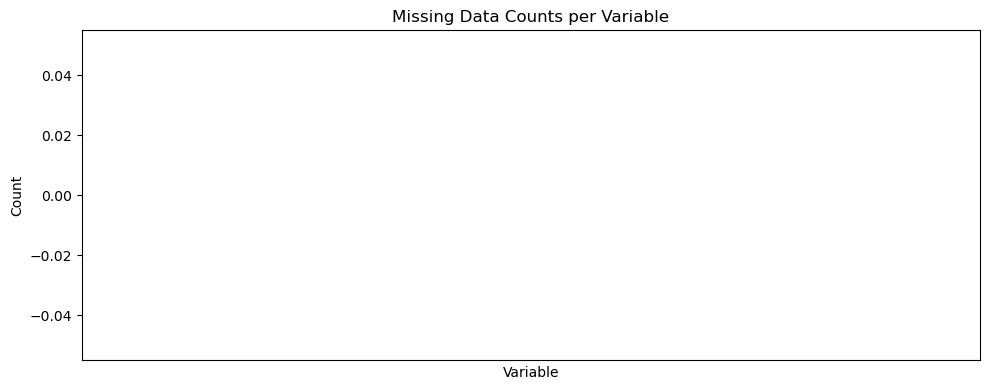

In [22]:
eda_helper_functions.plot_missing_info(train)


#### no missing value found

# High Level Analysis Of Outliers

In [53]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [54]:
(
    train
    .assign(outlier=forest.fit_predict(
        train
        .drop(columns="price")
        .select_dtypes(include="number")
    ))
    .query("outlier == -1")
   
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Indigo,2019-06-03,delhi,cochin,2024-06-18 10:35:00,2024-06-18 01:30:00,895,1.0,No info,5883,-1
2,Spicejet,2019-04-03,kolkata,banglore,2024-06-18 15:05:00,2024-06-18 20:20:00,315,1.0,No info,4649,-1
3,Air India,2019-03-06,mumbai,hyderabad,2024-06-18 05:05:00,2024-06-18 16:55:00,710,2.0,No info,16697,-1
4,Jet Airways,2019-06-21,banglore,delhi,2024-06-18 18:55:00,2024-06-18 22:00:00,185,0.0,in-flight meal not included,7754,-1
7,Spicejet,2019-05-18,chennai,kolkata,2024-06-18 09:45:00,2024-06-18 12:00:00,135,0.0,no check-in baggage included,3543,-1
...,...,...,...,...,...,...,...,...,...,...,...
3188,Jet Airways,2019-06-15,delhi,cochin,2024-06-18 18:20:00,2024-06-18 12:35:00,1095,2.0,No info,14300,-1
3189,Jet Airways,2019-03-18,mumbai,hyderabad,2024-06-18 10:20:00,2024-06-18 11:50:00,90,0.0,in-flight meal not included,4160,-1
3192,Air India,2019-03-06,delhi,cochin,2024-06-18 17:40:00,2024-06-18 08:15:00,875,1.0,No info,11038,-1
3194,Vistara,2019-03-24,kolkata,banglore,2024-06-18 17:00:00,2024-06-18 09:10:00,970,1.0,No info,13310,-1


# 6. PairPlot

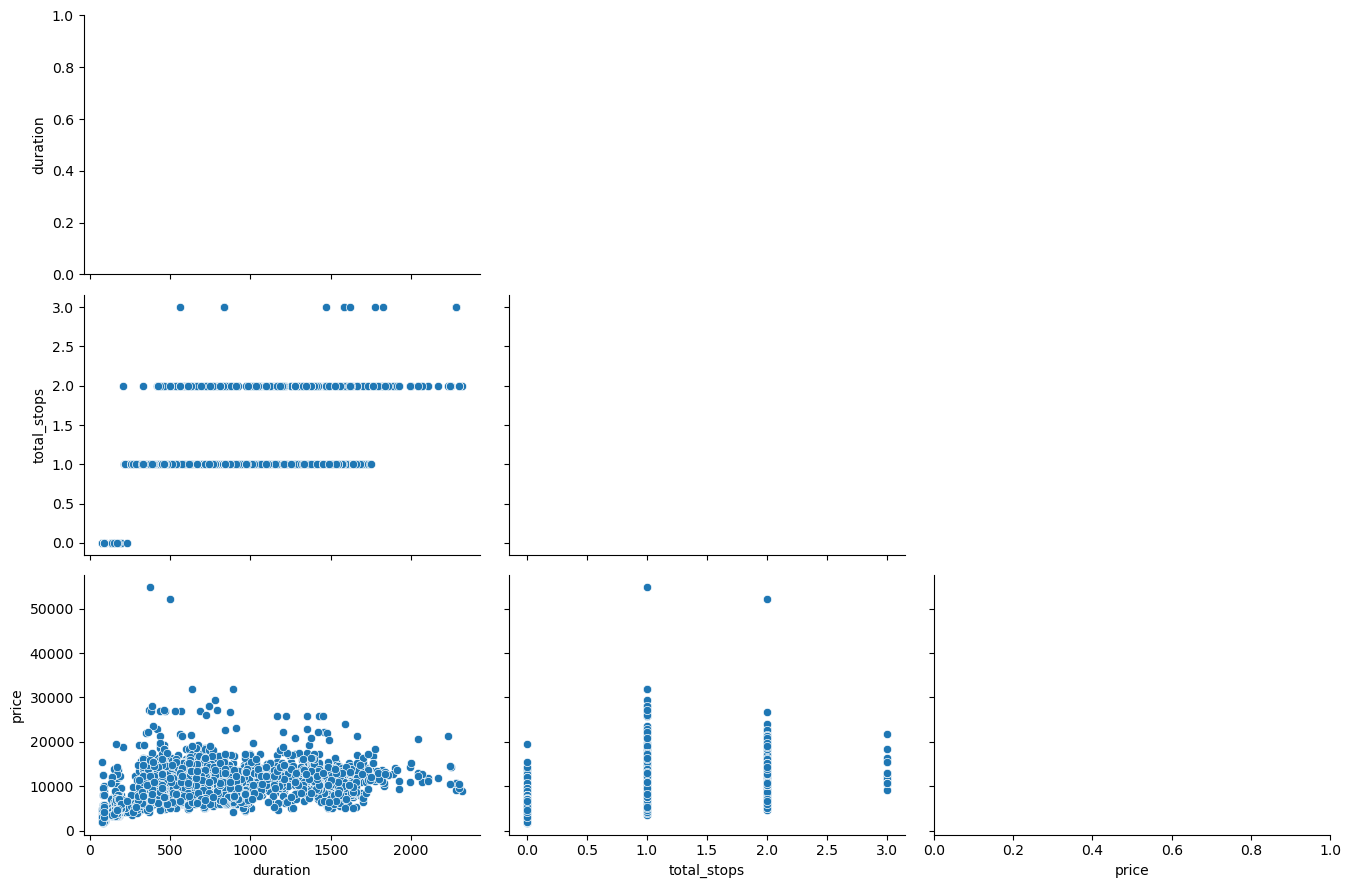

In [55]:
eda_helper_functions.pair_plots(train)

### Observations:

#####  -) Price vs Duration:

Trend: There is a scattered distribution with no clear trend. However, most of the flight prices seem to be concentrated below 20,000 rupees.
Outliers: There are a few outliers with prices above 40,000 units, which may indicate either high-end or last-minute flights.

##### -) Price vs Total Stops:

Trend: The prices are more or less evenly distributed across different total stops. However, there are clusters at specific stop counts.
Distribution: Most of the data points are concentrated at total stops = 0 and 1, indicating direct flights or flights with a single stop are more common.

##### -)Total Stops vs Duration:

Trend: Flights with more stops tend to have a longer duration, which is intuitive.
Clusters: There are distinct clusters at specific stop counts, particularly at 0 and 1, with varying durations. For higher stop counts, the duration appears to increase.

# 7. Correlation Analysis

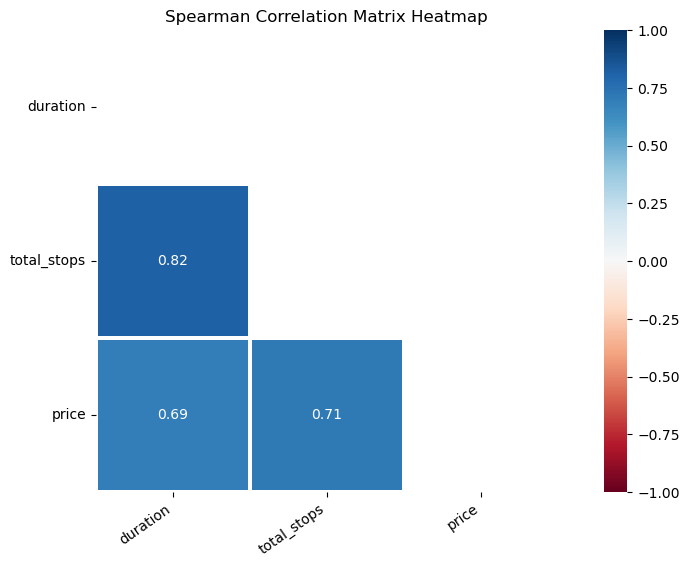

In [56]:
eda_helper_functions.correlation_heatmap(train)

### Observations: 

#### Strong Relationships:

The strongest correlation is between duration and total_stops (0.83), highlighting that the number of stops is a significant factor in determining the flight duration.

#### Moderately Strong Relationships:

Both price with duration (0.69) and price with total_stops (0.71) show moderately strong positive correlations. This implies that both longer flights and flights with more stops generally cost more.

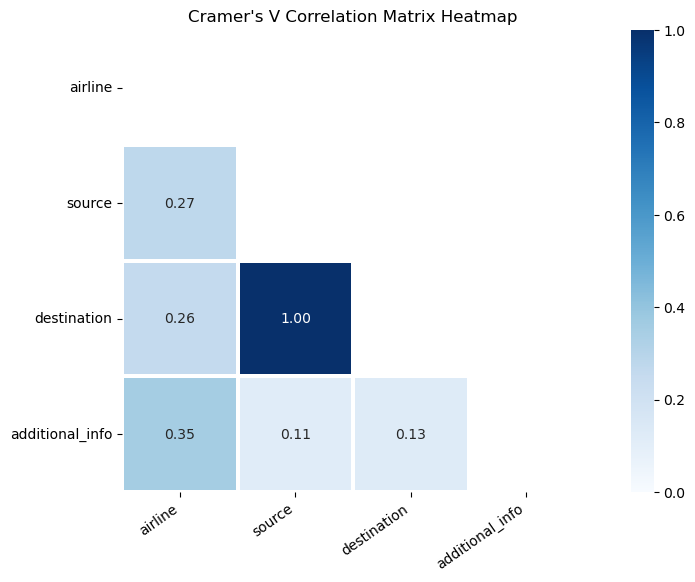

In [57]:
eda_helper_functions.cramersV_heatmap(train)

### Observations:
##### Moderate Relationships:

There are moderate correlations between airline and both source and destination, suggesting some preferences of airlines for 
specific routes.

The correlation between airline and additional_info is relatively stronger, indicating that certain airlines might offer distinct types of services.

#### Perfect Relationship:

The perfect correlation between source and destination is likely due to the dataset structure where each route has a unique source-destination pair. (practically very true as well).

#### Weak Relationships:

The weak correlations involving additional_info with source and destination indicate that the additional information is not heavily dependent on the route's origin or destination.

# 8. Detailed Analysis

In [58]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

##### we will first focus on object type:

## 1.Airline

In [59]:
eda_helper_functions.cat_summary(train, 'airline')

0       Multiple Carriers
1                  Indigo
2                Spicejet
3               Air India
4             Jet Airways
              ...        
3195    Multiple Carriers
3196            Air India
3197          Jet Airways
3198          Jet Airways
3199          Jet Airways
Name: airline, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,8
top,Jet Airways
freq,1146


,count,percentage
category,,
Jet Airways,1146,0.358125
Indigo,642,0.200625
Air India,518,0.161875
Multiple Carriers,342,0.106875
Spicejet,235,0.073438
Vistara,162,0.050625
Air Asia,100,0.031250
Goair,55,0.017188


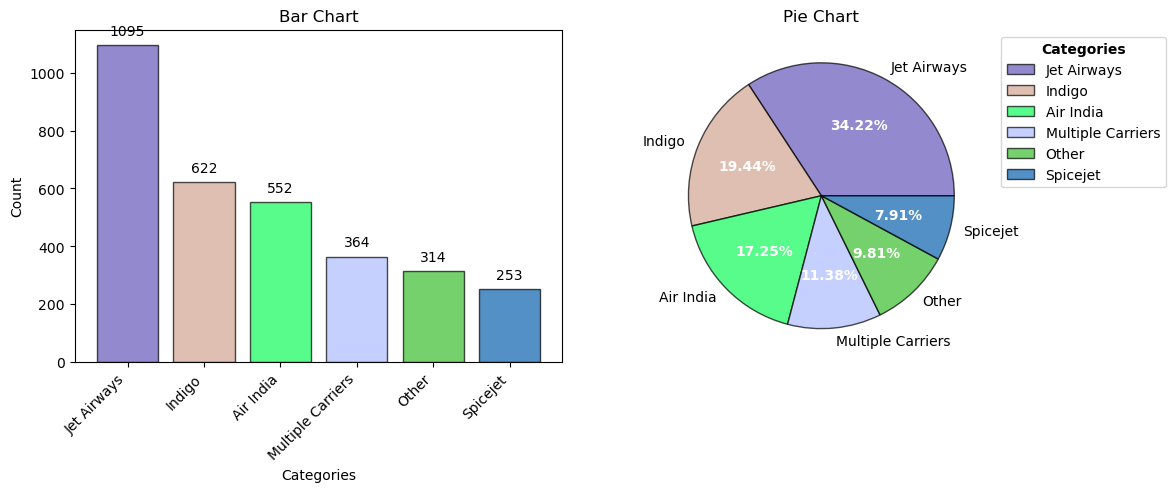

In [32]:
eda_helper_functions.cat_univar_plots(train, 'airline', show_wordcloud=False, k=5)

### Observations: 

-) Most popular airline is Jet Airways (34 %) times used.

-) total 8 distinct airlines are present in this dataset

-) 3 airways make the major part of the dataset (most used airline).

# 2.Source

In [60]:
eda_helper_functions.cat_summary(train, 'source')

0          delhi
1          delhi
2        kolkata
3         mumbai
4       banglore
          ...   
3195       delhi
3196       delhi
3197     kolkata
3198    banglore
3199     kolkata
Name: source, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 5 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,5
top,delhi
freq,1307


,count,percentage
category,,
delhi,1307,0.408438
kolkata,902,0.281875
banglore,669,0.209063
mumbai,220,0.068750
chennai,102,0.031875


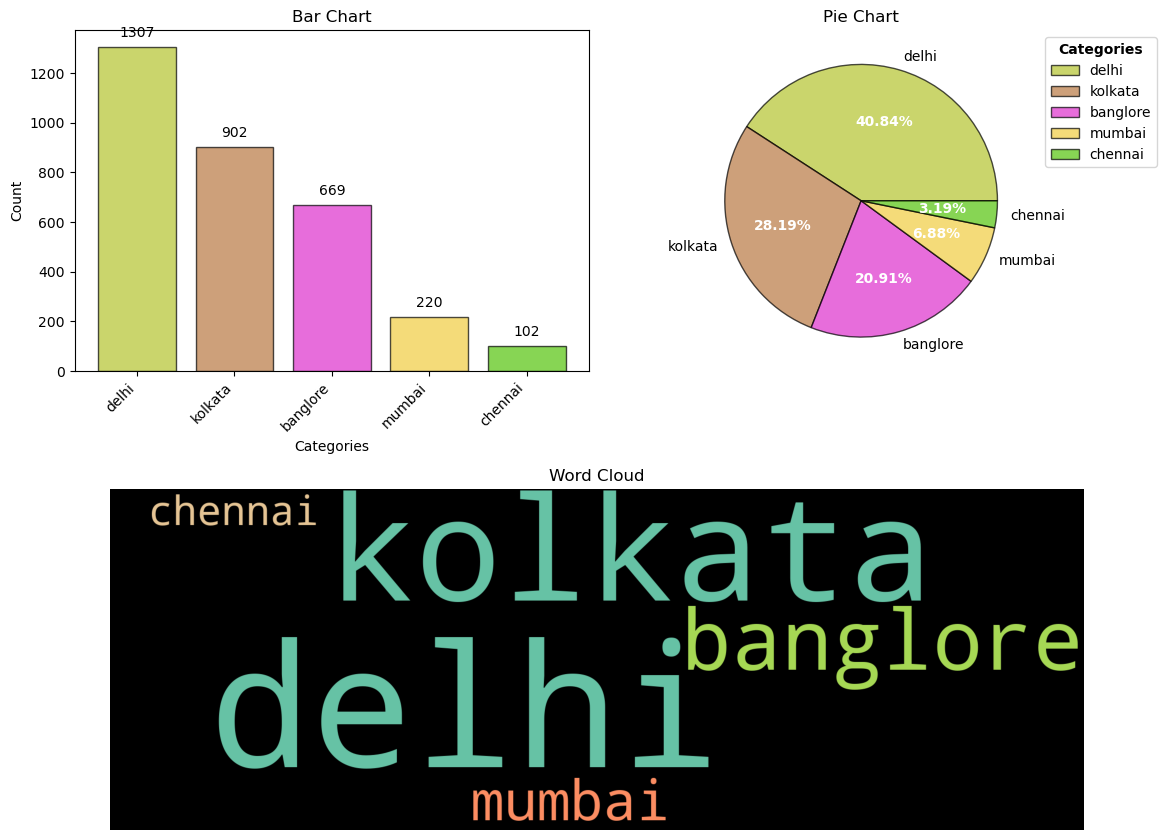

In [61]:
eda_helper_functions.cat_univar_plots(train, 'source')

### observations: 

-) Most popular source city is Delhi, most flights taking off from here.

-) Kolkata and Bangalore are also among popular source locations.

-) Total 5 cities present in dataset for source location.

# 3.Destination

In [62]:
eda_helper_functions.cat_summary(train, 'destination')

0          cochin
1          cochin
2        banglore
3       hyderabad
4           delhi
          ...    
3195       cochin
3196       cochin
3197     banglore
3198    new delhi
3199     banglore
Name: destination, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 6 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,6
top,cochin
freq,1307


,count,percentage
category,,
cochin,1307,0.408438
banglore,902,0.281875
delhi,394,0.123125
new delhi,275,0.085938
hyderabad,220,0.068750
kolkata,102,0.031875


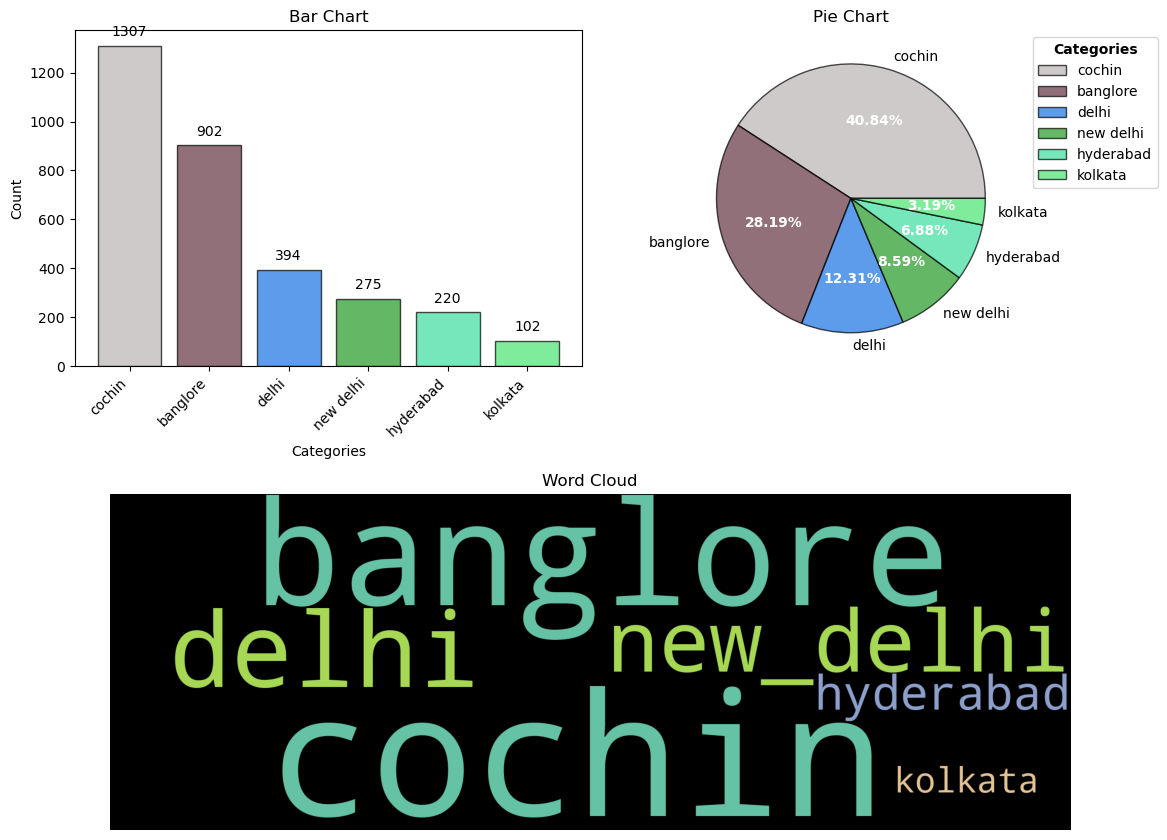

In [63]:
eda_helper_functions.cat_univar_plots(train, 'destination')

### Observations: 

-) Cochin is the most popular destination. 

-) Banglore also popular in both source and destination.

-) Total 6 cities for destination.


# 4.Additional_info


In [39]:
eda_helper_functions.cat_summary(train, 'additional_info')

0                            no info
1                            no info
2        in-flight meal not included
3       no check-in baggage included
4                            no info
                    ...             
3195                         no info
3196                         no info
3197                         no info
3198                         no info
3199                         no info
Name: additional_info, Length: 3200, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,
count,3200
unique,7
top,no info
freq,2534


,count,percentage
category,,
no info,2534,0.791875
in-flight meal not included,551,0.172187
no check-in baggage included,108,0.033750
1 long layover,4,0.001250
red-eye flight,1,0.000313
business class,1,0.000313
change airports,1,0.000313


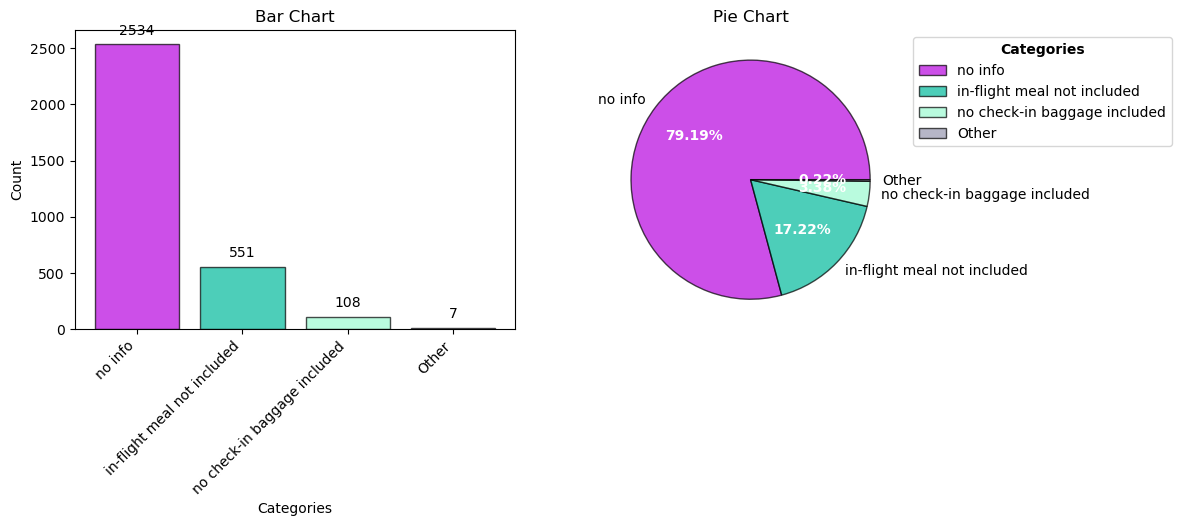

In [44]:
eda_helper_functions.cat_univar_plots(train, 'additional_info', show_wordcloud=False, k=3)

### Observations: 

-) Most of the flights have no additional info given.

-) One or more flights dont have inflight-meal included (can impact the price).

-) Simalarly one or more flight dont have check-in luggage included (again can impact flight).

### Eda on integer type data

In [64]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

# 5. Duration

In [48]:
eda_helper_functions.num_summary(train, "duration")

0        150
1        310
2       1015
3        155
4       1365
        ... 
3195    1045
3196    1590
3197     175
3198     165
3199     775
Name: duration, Length: 3200, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 3,200 / 3,200 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,505.0
75,925.0
90,1440.5
95,1615.0
99,1855.7


,value
mean,634.896875
trimmed mean (5%),600.215278
trimmed mean (10%),571.945312
median,505.000000


,value
var,256869.104710
std,506.822557
IQR,755.000000
mad,335.000000
coef_variance,0.798275


,value
skewness,0.916289
kurtosis,0.012362


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.064986832886861e-43
Test Statistic       : 0.8850411176681519
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 120.28832510448183
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


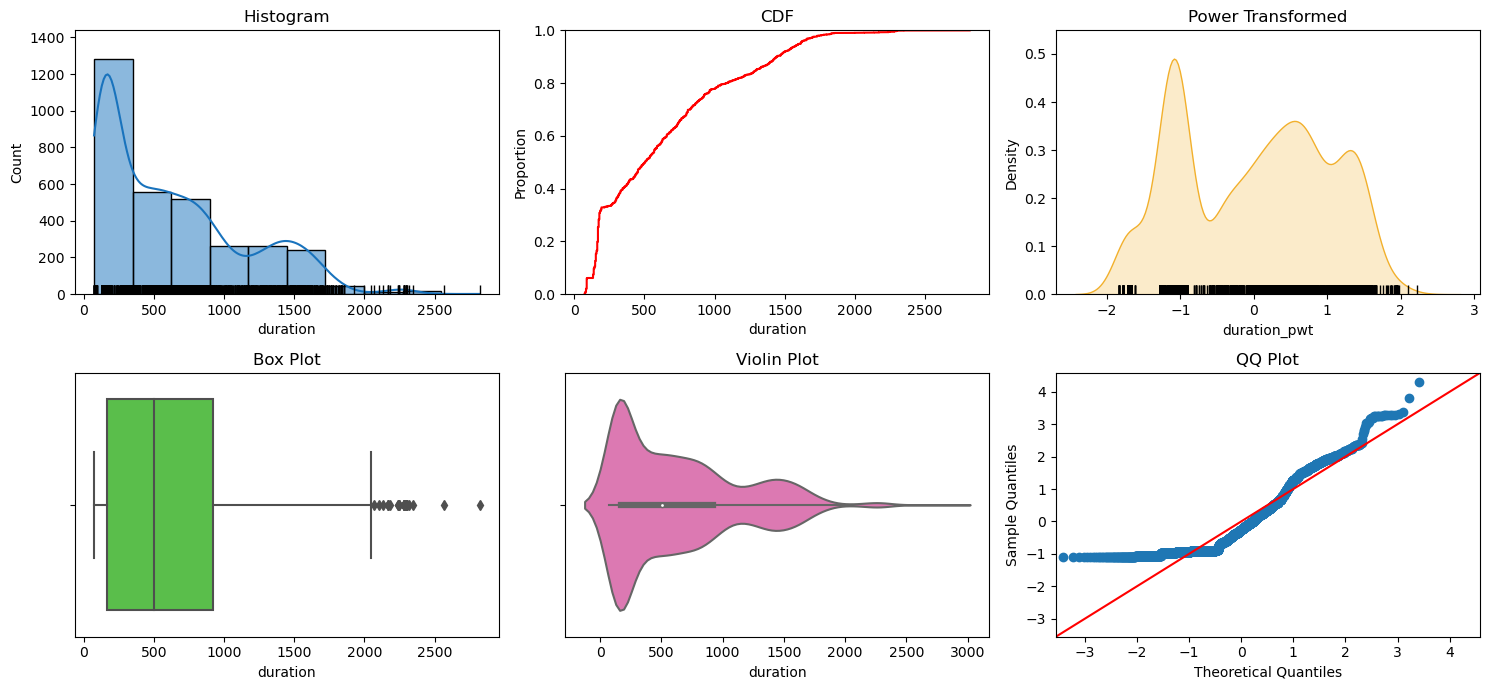

In [49]:
eda_helper_functions.num_univar_plots(train, 'duration')

### Observations: 

-) Average duration for a flight is 634.8 minutes (10.5 hrs) which is very high.

-) Using the hypothesis testing we come to the conclusion that the data is not normally distributed. 

-) we can notice some outliers in the box plot.

-) highly rightly skewed distribution. 

## Date Time data analysis:

# 7. date_of_journey

In [51]:
train.date_of_journey

0      2019-04-18
1      2019-06-09
2      2019-03-27
3      2019-06-09
4      2019-03-03
          ...    
3195   2019-05-12
3196   2019-03-12
3197   2019-04-12
3198   2019-05-01
3199   2019-05-06
Name: date_of_journey, Length: 3200, dtype: datetime64[ns]

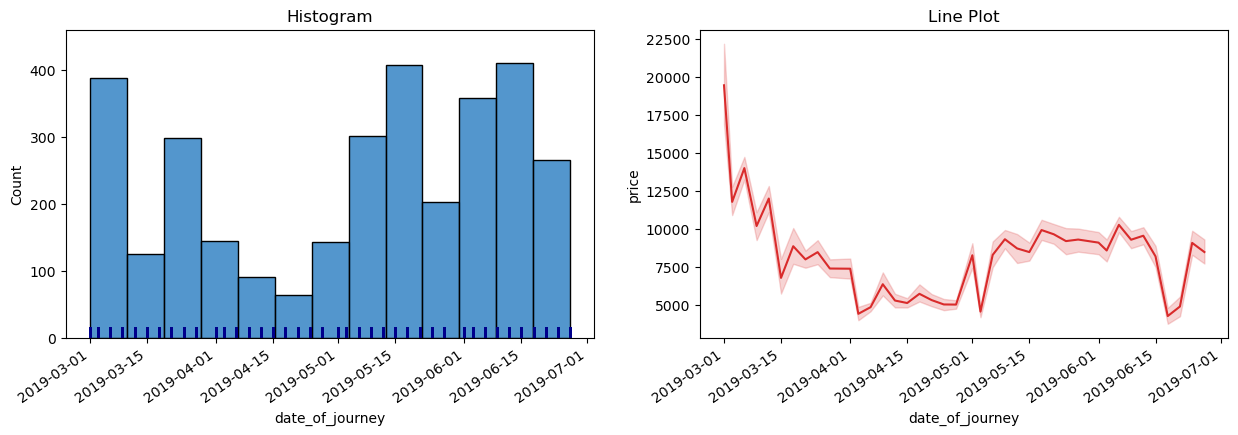

In [52]:

eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

### Observations:

-) Most of the flights scheduled in month '3','5' and '6'.

-) Prices are the highest in month 3.

-) Prices tend to increase after the 5th month and after it until month 7.


In [60]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    )




,price
date_of_journey,
2019-03-31,10688.816276
2019-04-30,5799.769231
2019-05-31,8950.901846
2019-06-30,8871.337198


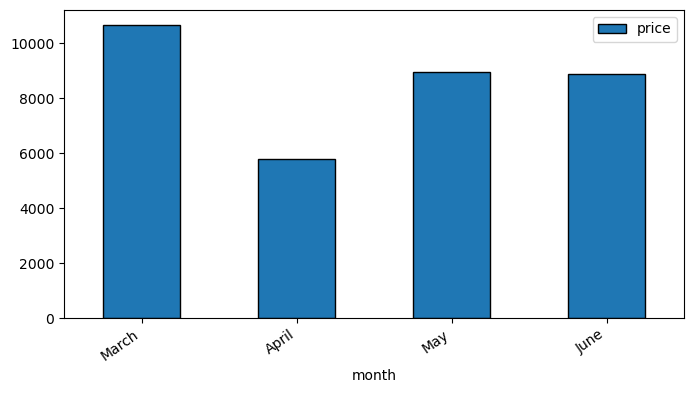

In [61]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)


### Observation:

##### above diagram shows the price by each month with March being the month in which prices are the highest followed by May and June having almost same avg price.

##### Prices are very low in April when compared with other months.


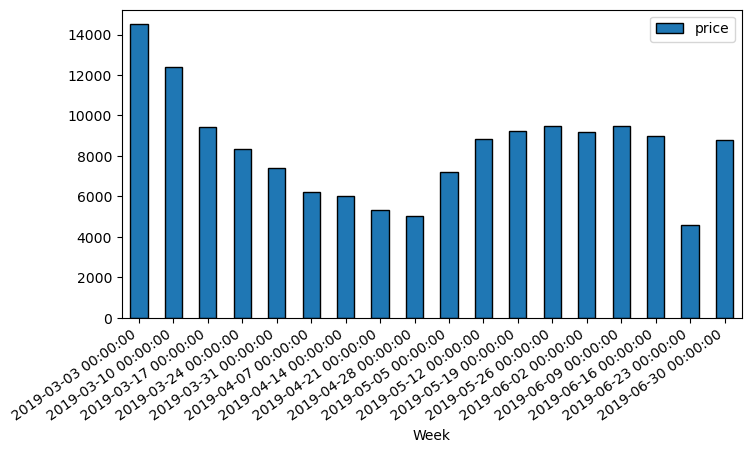

In [62]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="Week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
    )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

##### varying prices displayed with respect to weeks.

# 8. Dep_time           

In [74]:
train.dep_time

0      2024-06-17 19:55:00
1      2024-06-17 17:05:00
2      2024-06-17 11:30:00
3      2024-06-17 06:55:00
4      2024-06-17 05:40:00
               ...        
3195   2024-06-17 05:50:00
3196   2024-06-17 05:45:00
3197   2024-06-17 18:55:00
3198   2024-06-17 10:00:00
3199   2024-06-17 21:10:00
Name: dep_time, Length: 3200, dtype: datetime64[ns]

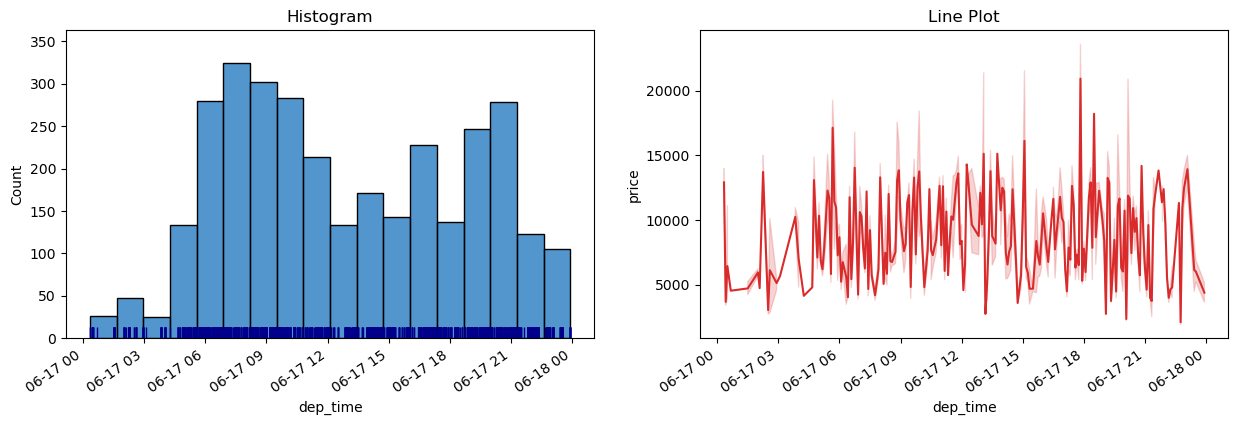

In [73]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

# BiVariate Analysis 

In [12]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

### Airline vs Price:

In [65]:
avg_price_per_airline = (
    train
    .groupby('airline')['price']
    .mean()
    .reset_index()
    .sort_values(by='price', ascending=False)
)

In [66]:
avg_price_per_airline

,airline,price
4,Jet Airways,11676.624782
5,Multiple Carriers,10898.149123
1,Air India,9554.538610
7,Vistara,7738.302469
3,Indigo,5677.542056
2,Goair,5637.418182
0,Air Asia,5324.120000
6,Spicejet,4263.251064


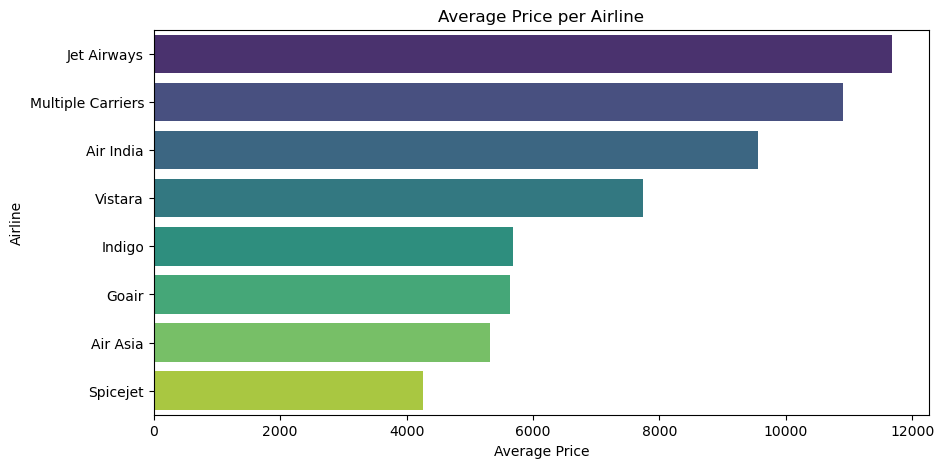

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x='price', y='airline', data=avg_price_per_airline, palette='viridis')
plt.title('Average Price per Airline')
plt.xlabel('Average Price')
plt.ylabel('Airline')
plt.show()

#### above barplot shows the avg price of each airline ---> Jet Airways being the highest : 11676

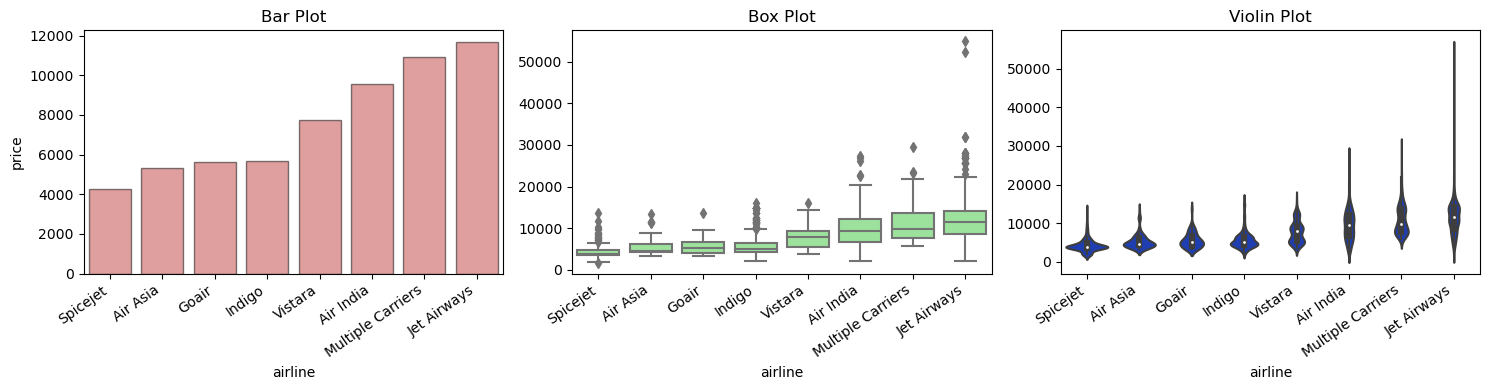

In [77]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

### we can notice there are many outliers present in the data.

In [78]:
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## Airline vs total_stops

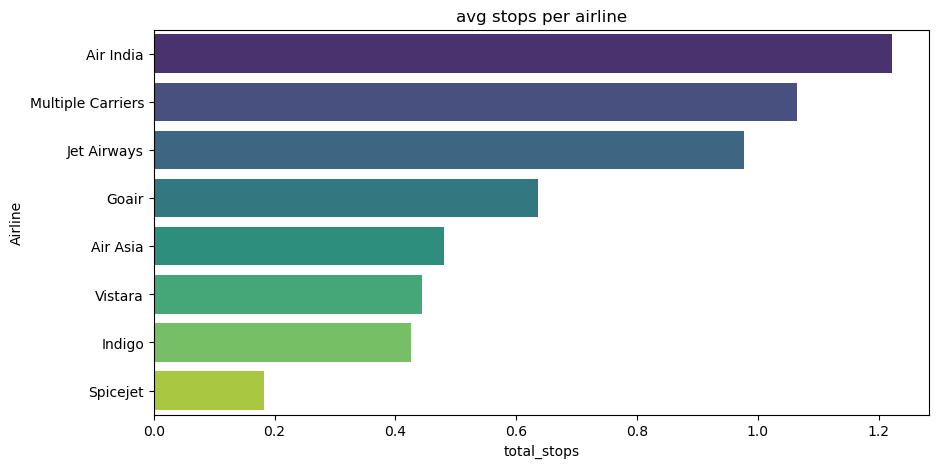

In [88]:
def plot_avg_stops_per_airline(data, num_var, cat_var, title):
    """
    Plots a bar plot for the average number of stops per airline.
    
    Parameters:
    data (DataFrame): The dataset.
    num_var (str): The numerical variable representing stops.
    cat_var (str): The categorical variable representing airlines.
    """
    # Calculate the average number of stops per airline
    avg_stops_per_airline = data.groupby(cat_var)[num_var].mean().reset_index()
    avg_stops_per_airline = avg_stops_per_airline.sort_values(by=num_var, ascending=False)

    # Create the bar plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=num_var, y=cat_var, data=avg_stops_per_airline, palette='viridis')
    plt.title(title)

    plt.ylabel('Airline')
    plt.show()

# Assuming `train` is your DataFrame and the column for stops is named 'total_stops'
plot_avg_stops_per_airline(data=train, num_var="total_stops", cat_var="airline", title='avg stops per airline')

#### we can notice Air India has the highest avg stops. 

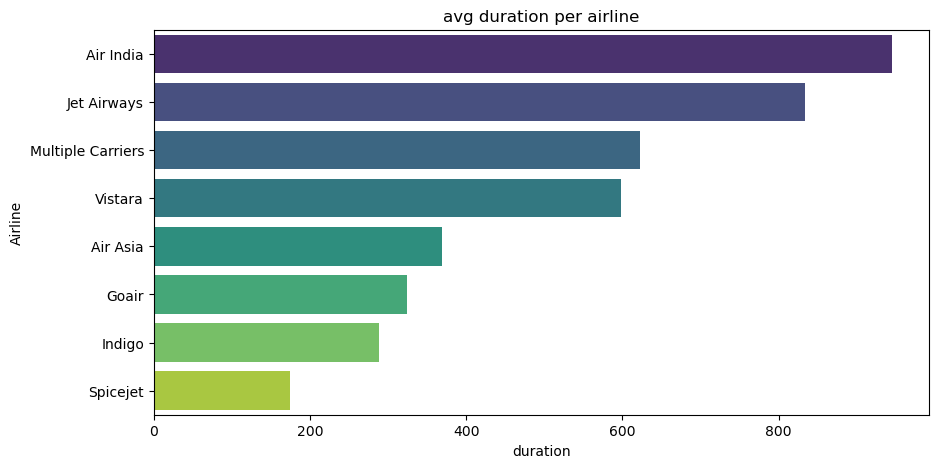

In [89]:

plot_avg_stops_per_airline(data=train, num_var="duration", cat_var="airline", title='avg duration per price')


#### Air India also has the longest duration time while Jet Airways is second, could be the reason why they have high prices as well

# Price per Destination:

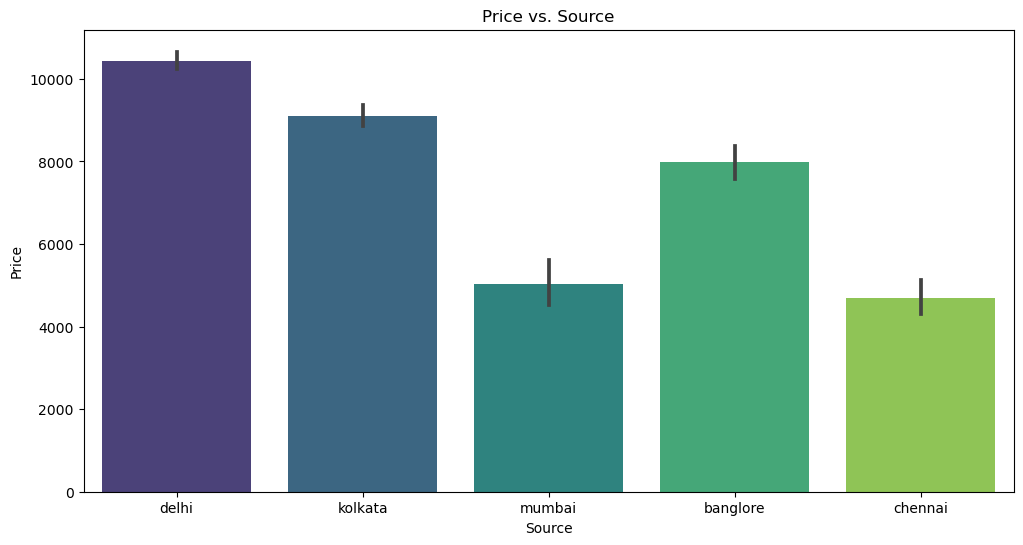

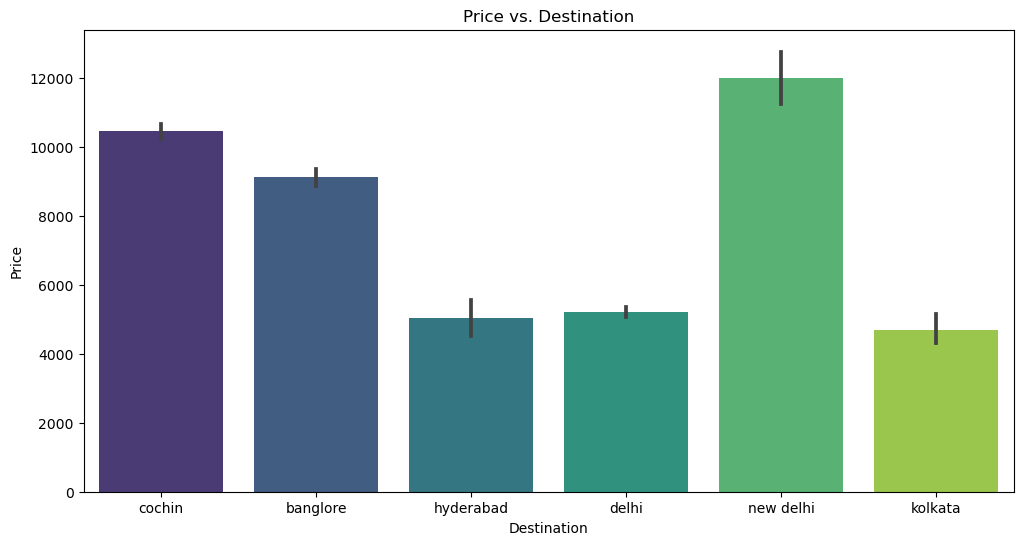

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='source', y='price', data=train, palette='viridis')
plt.title('Price vs. Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='destination', y='price', data=train, palette='viridis')
plt.title('Price vs. Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

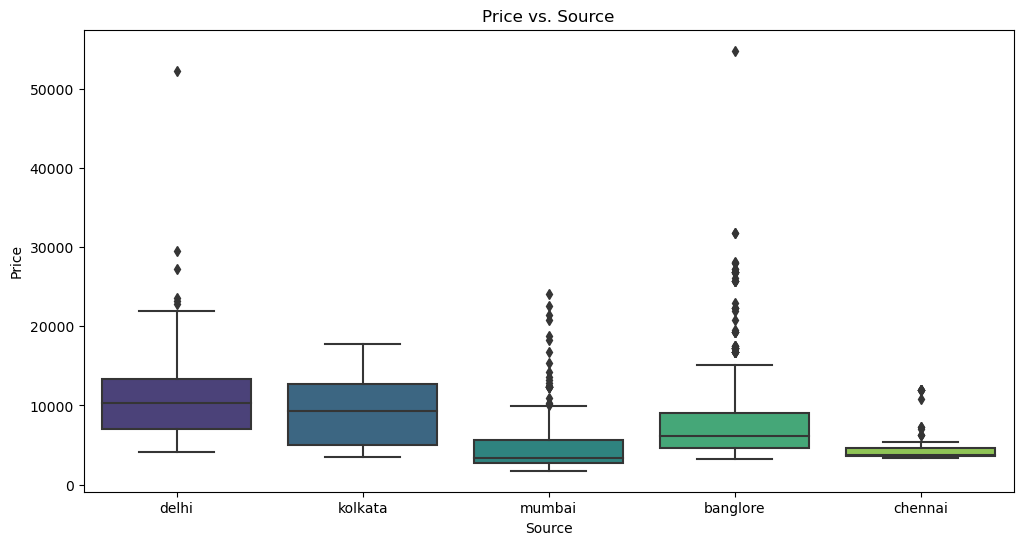

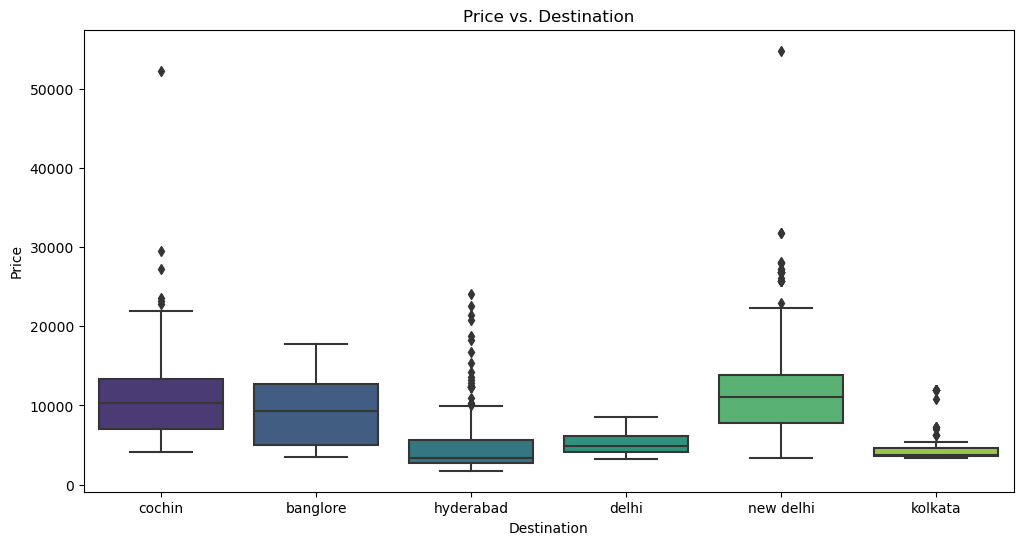

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='source', y='price', data=train, palette='viridis')
plt.title('Price vs. Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='destination', y='price', data=train, palette='viridis')
plt.title('Price vs. Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

#### Delhi is the most expensive source location, meaning flights flying from Delhi are generally expensive. Chennai and Mumbai are generally have low prices if they are the source city.

#### Fligths going to New Delhi are usually very high followed by Cochin and Banglore.

#### using boxplot we can notice lots of outliers as well.

# Price distribution with respect to airline and destination.

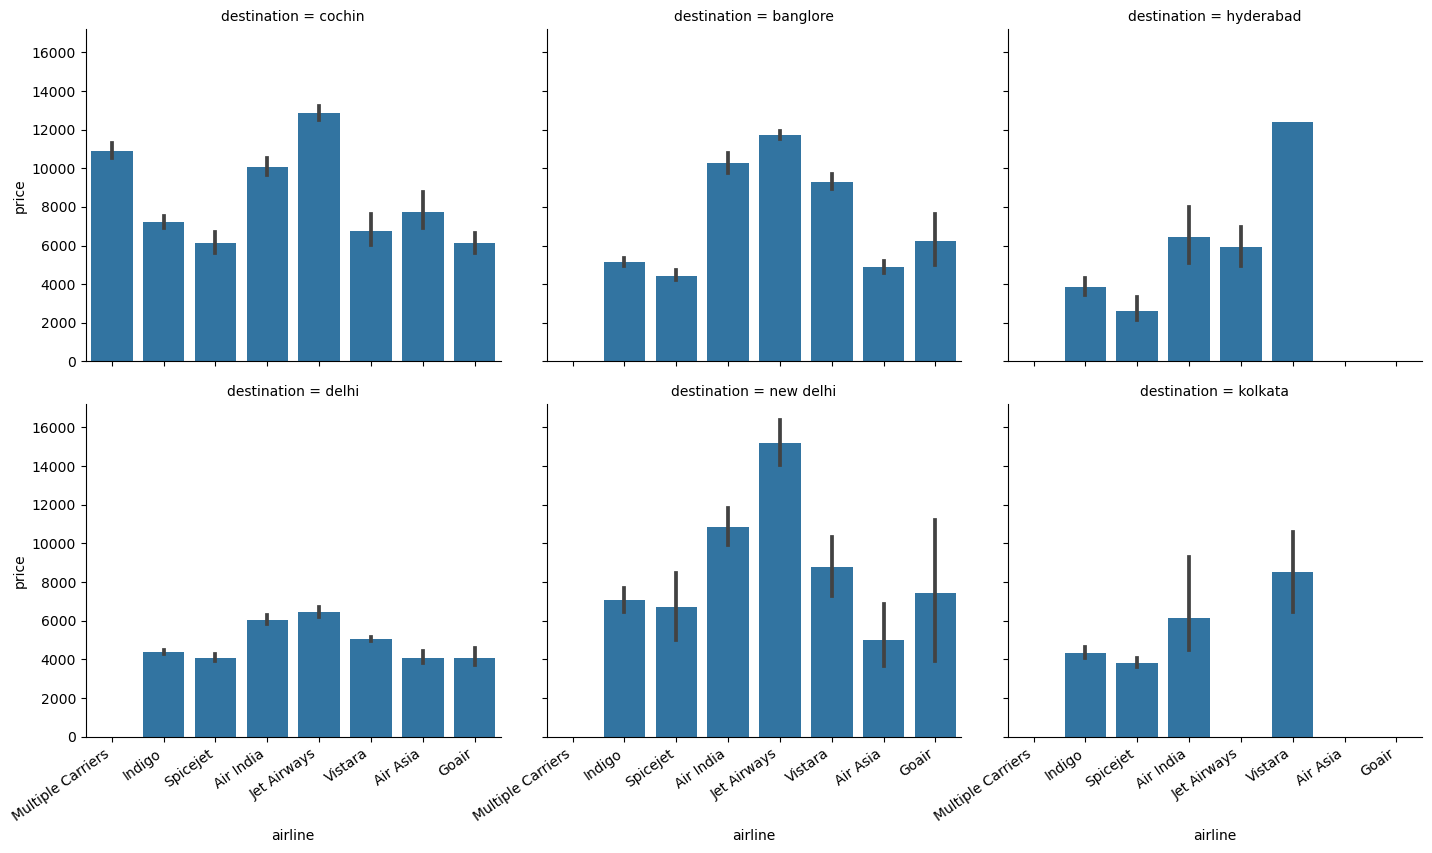

In [97]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

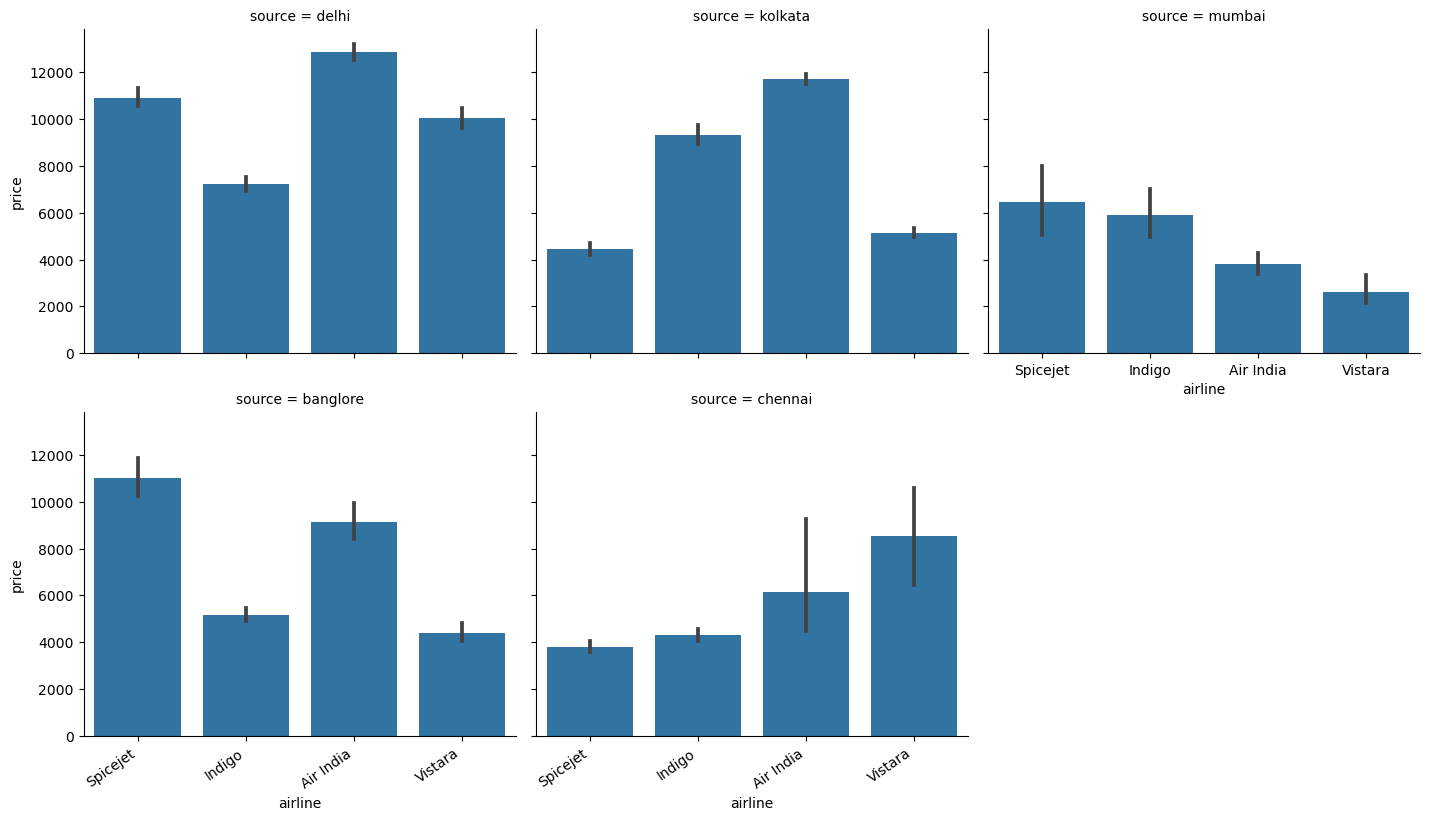

In [102]:
airline_grid = sns.FacetGrid(
    data=train,
    col="source",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price")

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)


# Average price for each source-destination pai

In [137]:
def calculate_avg_price_per_route(data):
    """
    this function will return A DataFrame containing the average price for each route.
    """
    # Group by source and destination, then calculate the mean price
    avg_price_per_route = data.groupby(['source', 'destination'])['price'].mean().reset_index()
    
    # Sort the DataFrame by price in descending order
    avg_price_per_route = avg_price_per_route.sort_values(by='price', ascending=False)
    
    return avg_price_per_route


avg_price_per_route_df = calculate_avg_price_per_route(train)

# Display the DataFrame
print(avg_price_per_route_df)

     source destination         price
1  banglore   new delhi  11979.752727
3     delhi      cochin  10444.214231
4   kolkata    banglore   9109.376940
0  banglore       delhi   5205.766497
5    mumbai   hyderabad   5041.572727
2   chennai     kolkata   4694.656863


#### so using this data we find out that Banglore to New delhi is the  most expensive flight. Chennai to Kolkata will be the cheapest.


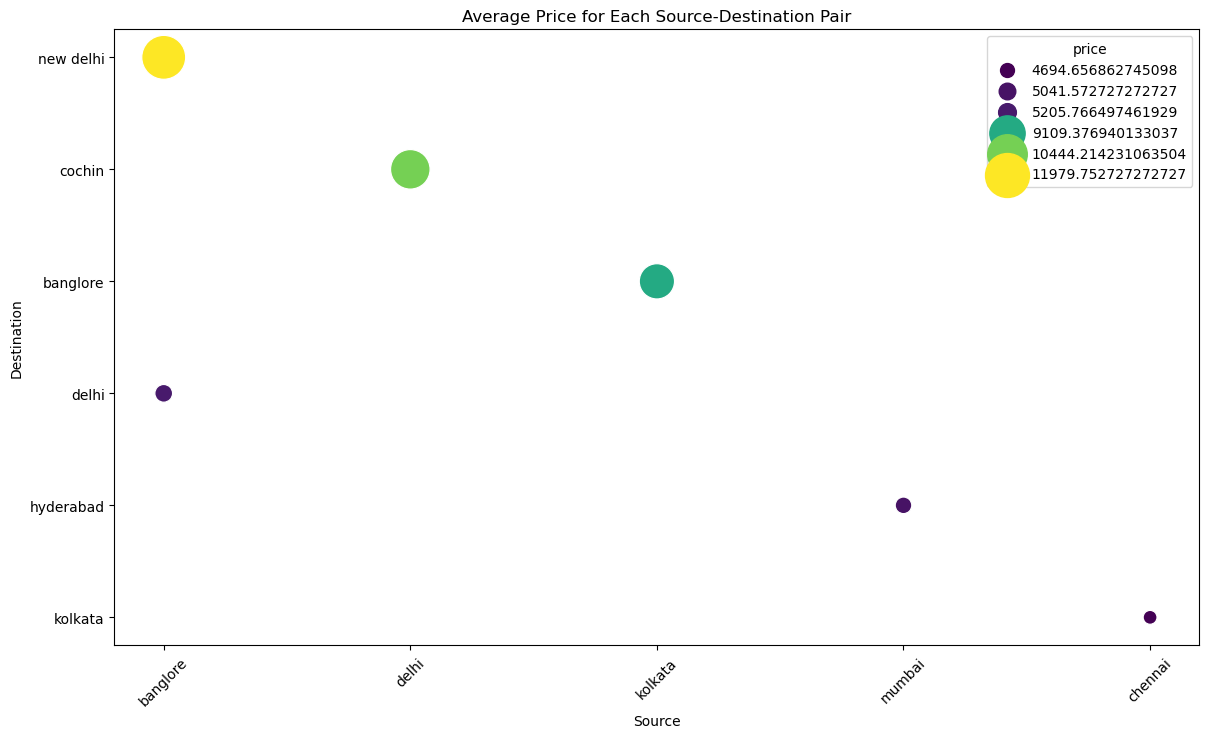

In [138]:
# Create a scatter plot to visualize the average price for each source-destination pair
plt.figure(figsize=(14, 8))
sns.scatterplot(x='source', y='destination', size='price', sizes=(100, 1000), hue='price', data=avg_price_per_route_df, palette='viridis')
plt.title('Average Price for Each Source-Destination Pair')
plt.xlabel('Source')
plt.ylabel('Destination')
plt.xticks(rotation=45)
plt.show()


# Price vs No of Stops

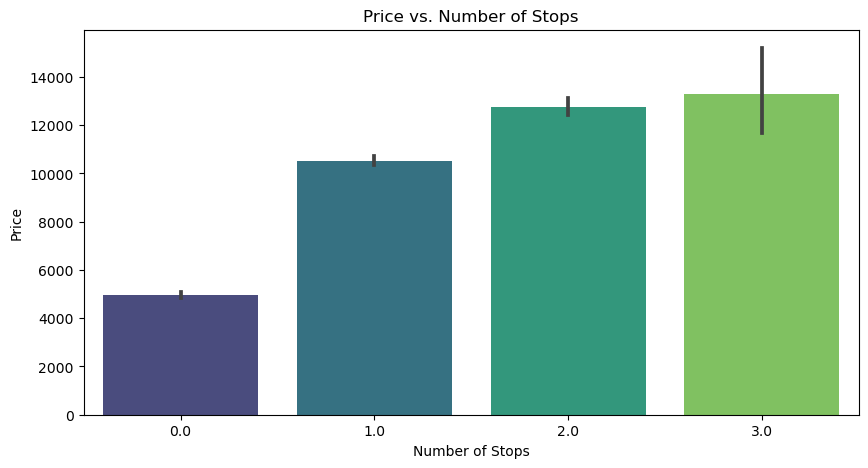

In [140]:
plt.figure(figsize=(10, 5))
sns.barplot(x='total_stops', y='price', data=train, palette='viridis')
plt.title('Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()


#### more stops == more price

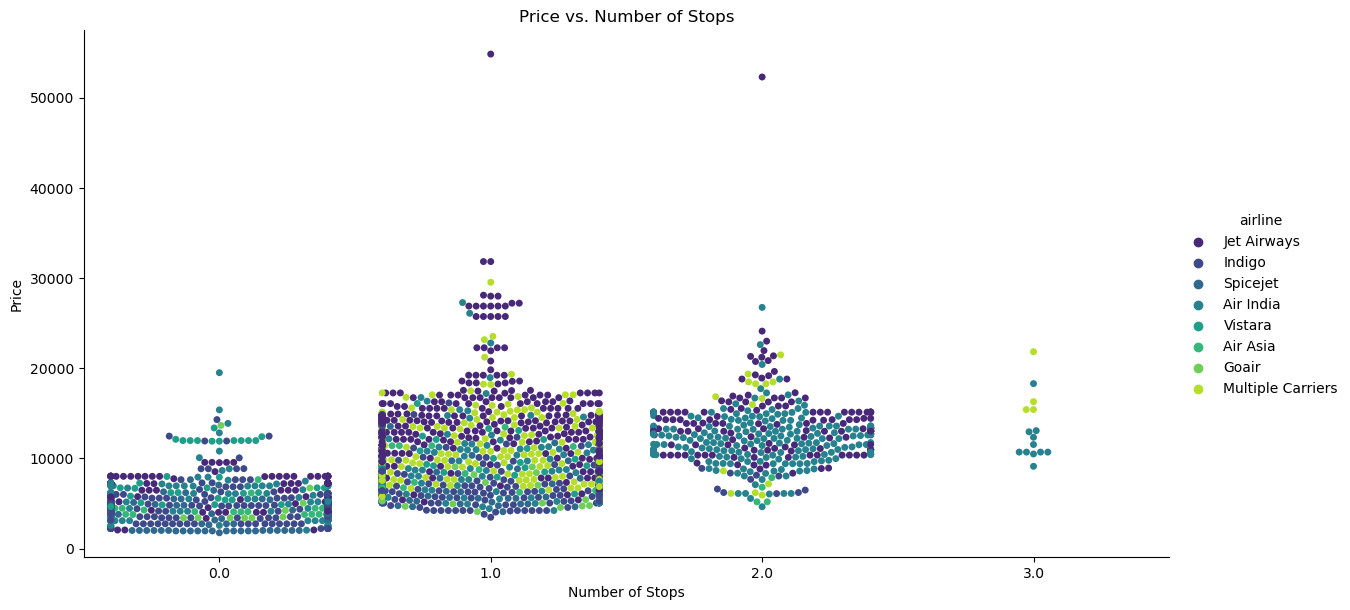

In [153]:
sns.catplot(x='total_stops', y='price', data=train, kind='swarm', hue='airline', height=6, aspect=2, palette='viridis')
plt.title('Price vs. Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

# Prices per month with resprect to source

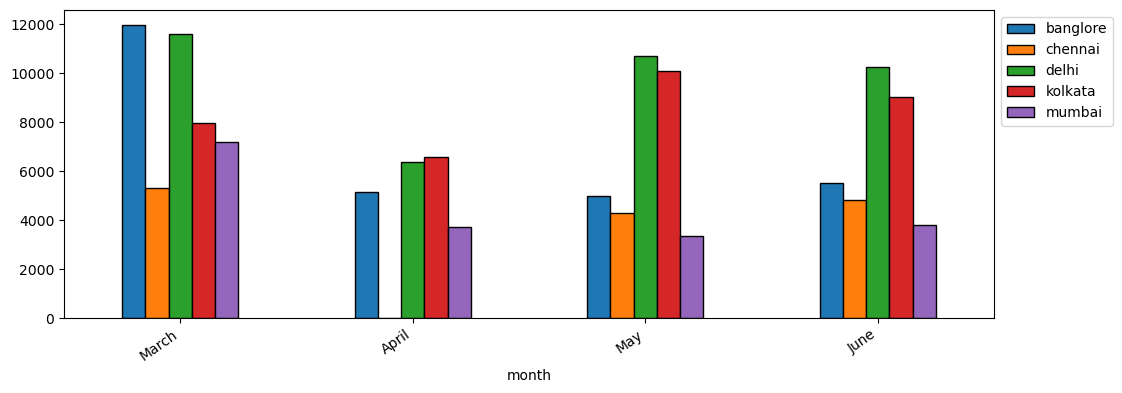

In [154]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
    )
)

ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### Observations: 

-) Prices are very high during March. Especially when taking off from Banglore and Delhi.

-) No flights for Chennai during April otherwise prices usally low and consistent

-) Most of the flights are cheapest during month of April.

# Prices per month with resprect to destination

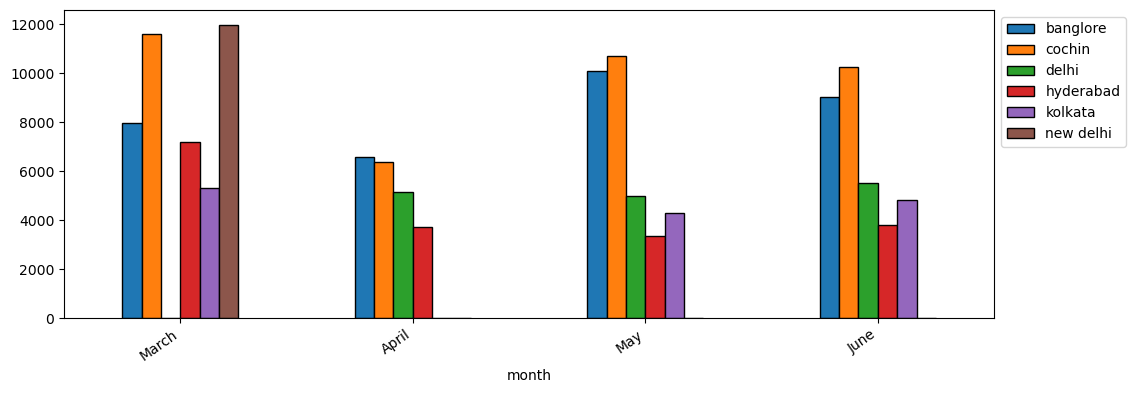

In [155]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "destination"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
    )
)

ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

### Observations: 

-) Price of New Delhi is very high in March and is also the only month in which flights go to this destination.

-) Same trend noticed, price in April are at lowest and highest during March.

-) Almost the same consistent price trend during May and June.

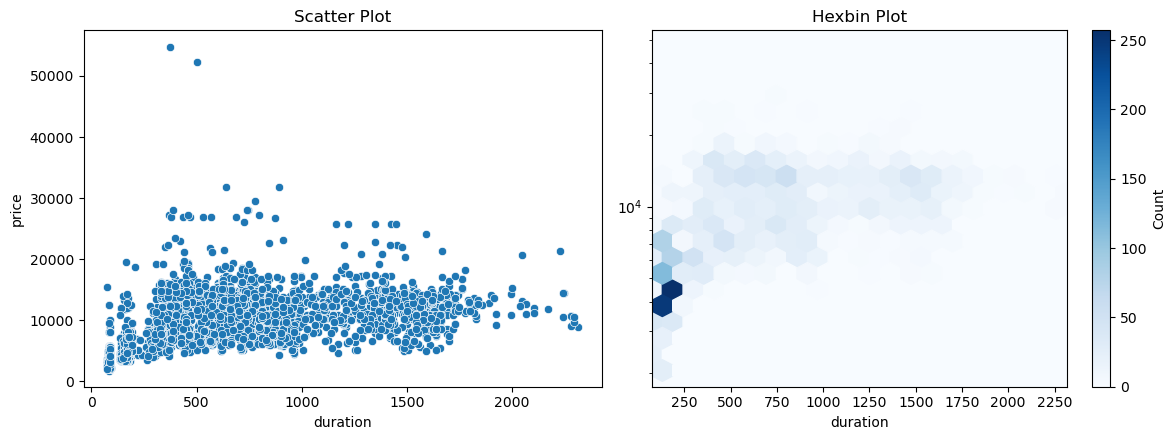

In [156]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [157]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5163598684169306
- p-value              : 1.2308283976203479e-217
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6937103154825773
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


#### Hypothesis testing for finding correlation of duration and price. The samples are found to be correlated.

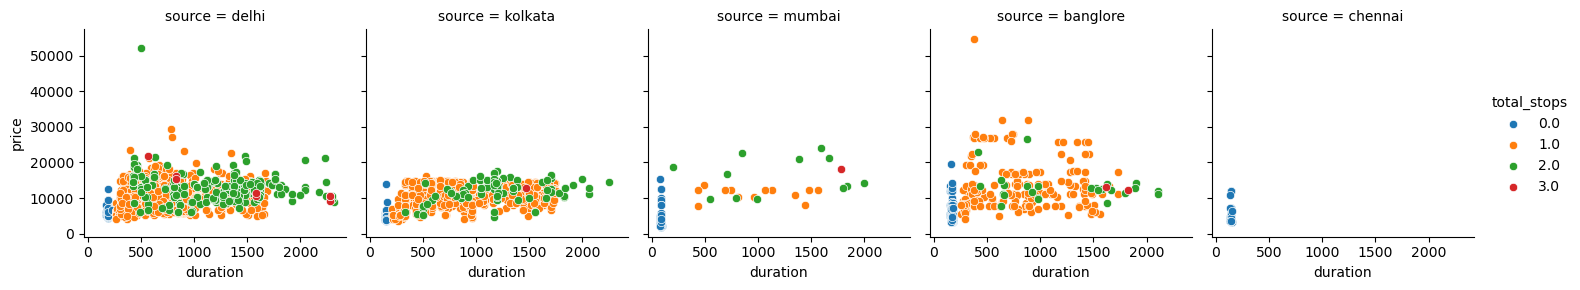

In [159]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

Price wrt to source and total_stops

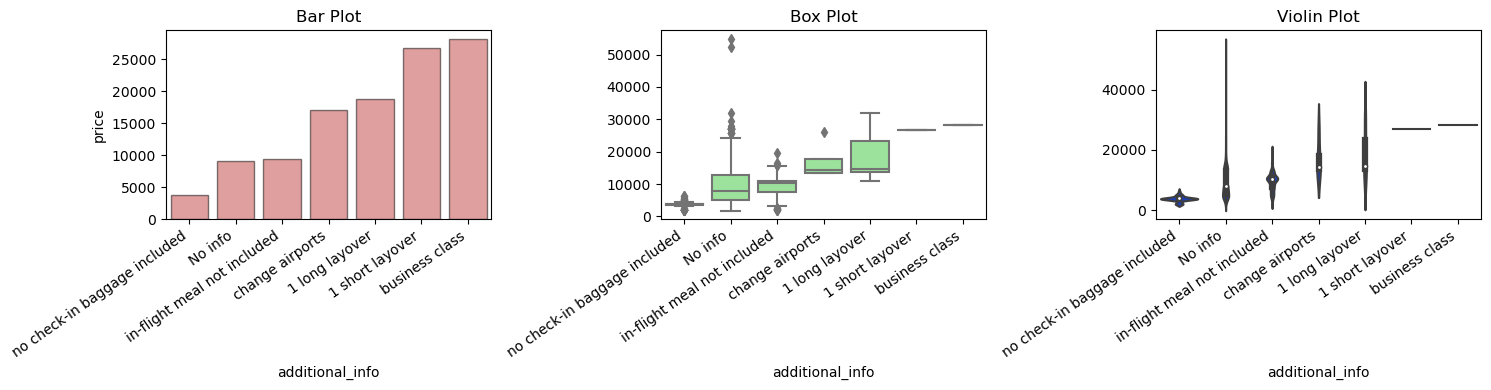

In [160]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

#### we can notice that flights are cheap if no check-in bags are allowed or no in-flight meal is included. 

#### Business class and short layover flights are expensive as they provide more comfort to customer. 